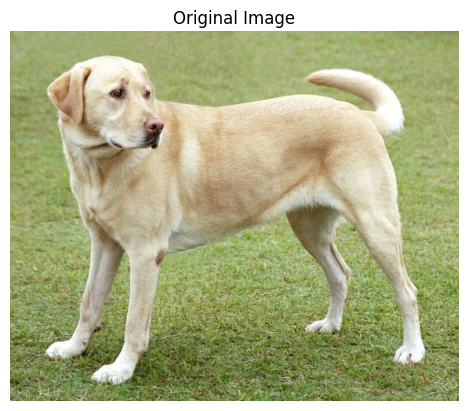

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load an image from a URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg"

# Use a user agent to avoid being blocked by the website
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(image_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()


In [2]:
#**Step 2: Preprocess the Image**

from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)


In [3]:
#**Step 3: Load the Pre-trained Vision Transformer Model**
from torchvision.models import vit_b_16

# Load a pre-trained Vision Transformer model
model = vit_b_16(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Forward pass through the model
with torch.no_grad():  # No gradients are needed for inference
    output = model(input_batch)



d:\home\wx\.conda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\home\wx\.conda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted Label: Labrador Retriever


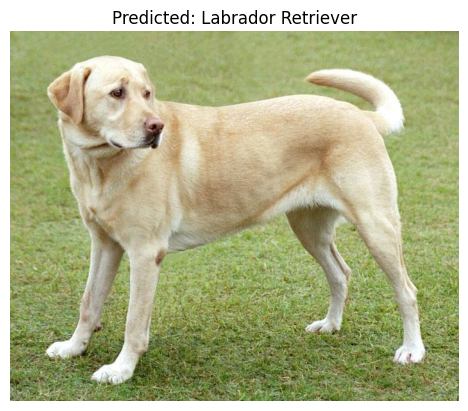

In [4]:
# Output: This will be a classification result (e.g., ImageNet classes)
#**Step 4: Interpret the Output**
from torchvision import models

# Load ImageNet labels for interpretation
imagenet_labels = requests.get("https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json").json()

# Get the index of the highest score
_, predicted_class = torch.max(output, 1)

# Display the predicted class
predicted_label = imagenet_labels[predicted_class.item()]
print(f"Predicted Label: {predicted_label}")

# Visualize the result
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [5]:
#**Building an Interactive Image Classifier**
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from PIL import Image
import torch
import matplotlib.pyplot as plt
from io import BytesIO
import requests
from torchvision import transforms

# Preprocessing for the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create header with glowing title
header = HTML("""
    <div style='text-align:center; margin-bottom:20px;'>
        <h1 style='font-family: Arial, sans-serif; color: #ffe814; font-size: 40px; text-shadow: 0 0 8px #39FF14;'>
            Vision Transformer Object Detection
        </h1>
        <p style='font-family: Arial, sans-serif; color: #ff14b5; font-size:20px'>Upload an image or select a sample image from the cards below</p>
    </div>
""")

# Footer with signature
footer = HTML("""
    <div style='text-align:center; margin-top:20px;'>
        <p style='font-family: Arial, sans-serif; color: #f3f5f2; font-size:25px'>Powered by Vision Transformers | PyTorch | ipywidgets and Create by AI Innovators</p>
    </div>
""")

# Make upload button bigger and centered
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
upload_widget.layout = widgets.Layout(width='100%', height='50px')
upload_widget.style.button_color = '#007ACC'
upload_widget.style.button_style = 'success'

# Sample images (as cards)
sample_images = [
    ("Dog", "https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg"),
    ("Cat", "https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg"),
    ("Car", "https://upload.wikimedia.org/wikipedia/commons/f/fc/Porsche_911_Carrera_S_%287522427256%29.jpg"),
    ("Bird", "https://upload.wikimedia.org/wikipedia/commons/3/32/House_sparrow04.jpg"),
    ("Laptop", "https://upload.wikimedia.org/wikipedia/commons/c/c9/MSI_Gaming_Laptop_on_wood_floor.jpg")
]

In [6]:
# Function to display and process image
def process_image(image):
    # Clear any previous outputs and predictions
    clear_output(wait=True)

    # Re-display header, upload button, and sample images after clearing
    display(header)
    display(upload_widget)
    display(sample_buttons_box)

    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Center and display the uploaded image
    plt.imshow(image)
    plt.axis('off')
    plt.title('Uploaded Image')
    plt.show()

    # Preprocess and make prediction
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)

    with torch.no_grad():
        output = model(input_batch)

    _, predicted_class = torch.max(output, 1)
    predicted_label = imagenet_labels[predicted_class.item()]

    # Display the prediction with space and style
    display(HTML(f"""
        <div style='text-align:center; margin-top:20px; font-size:30px; font-weight:bold; color:#39FF14; text-shadow: 0 0 8px #39FF14;'>
            Predicted: {predicted_label}
        </div>
    """))

    # Display footer after prediction
    display(footer)



In [7]:
# Function triggered by file upload
def on_image_upload(change):
    uploaded_image = Image.open(BytesIO(upload_widget.value[list(upload_widget.value.keys())[0]]['content']))
    process_image(uploaded_image)

# Function to handle sample image selection
def on_sample_image_select(image_url):
    # Define custom headers with a compliant User-Agent
    headers = {
        'User-Agent': 'MyBot/1.0 (your-email@example.com)'  # Replace with your bot's name and contact email
    }

    response = requests.get(image_url, stream=True, headers=headers)
    response.raise_for_status()
    img = Image.open(response.raw)
    process_image(img)

# Add a button for each sample image to the UI (as cards)
sample_image_buttons = [widgets.Button(description=label, layout=widgets.Layout(width='150px', height='150px')) for label, _ in sample_images]

# Link each button to its corresponding image
for button, (_, url) in zip(sample_image_buttons, sample_images):
    button.on_click(lambda b, url=url: on_sample_image_select(url))

# Display buttons horizontally
sample_buttons_box = widgets.HBox(sample_image_buttons, layout=widgets.Layout(justify_content='center'))

# Link the upload widget to the function
upload_widget.observe(on_image_upload, names='value')

# Display the complete UI
display(header)
display(upload_widget)  # Show file upload widget
display(sample_buttons_box)  # Display sample image cards

FileUpload(value=(), accept='image/*', description='Upload', layout=Layout(height='50px', width='100%'), style…